In [1]:
from synet.process.delay import simulate_delay
from synet.generators import create_temporal_network
from synet.propagators.paint import paint_entropy
from synet.propagators.paths import path_entropy
from synet.propagators.mixing import mixing_entropy
from synet.analysis import entropy_dt

from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import spearmanr


In [2]:
p_delay = 0.033
all_p_delay = [0, 0.01, 0.02, 0.03, 0.04, 0.05]
all_n_agents = [20, 40, 60, 120]
n_agents = 40
n_intern = 101
p_intern = 0
#all_p_intern = np.arange(n_intern)/(n_intern-1)
n_events = 10000
n_sample = 20
max_dt = 200


0
0.01
0.02
0.03
0.04
0.05
0
0.01
0.02
0.03
0.04
0.05
0
0.01
0.02
0.03
0.04
0.05
0
0.01
0.02
0.03
0.04
0.05


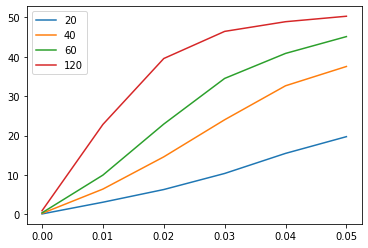

In [3]:

for n_agents in all_n_agents:
    A, event_list, participants = create_temporal_network(
        part_per_community=n_agents//2, p_intern=p_intern, n_events=n_events)
    avg_delay = []
    for p_delay in all_p_delay:
        cur_avg = 0
        for _ in range(n_sample):
            cur_avg += simulate_delay(participants, 1, n_events, p_delay=p_delay)
        avg_delay.append(np.mean(cur_avg))
        print(p_delay)
    plt.plot(all_p_delay, avg_delay, label=n_agents)
plt.legend()
plt.show()

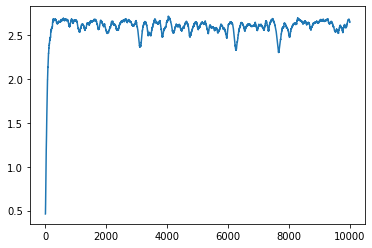

In [4]:
np.random.seed(71298337)
n_agents = 240
p_delay = 0.05
A, event_list, participants = create_temporal_network(
    part_per_community=n_agents//2, p_intern=p_intern, n_events=n_events)
plt.plot(simulate_delay(participants, 1, n_events, p_delay=p_delay))

In [5]:
methods = {
    "paint": paint_entropy,
    "path": path_entropy,
    "mix": mixing_entropy,
}


In [6]:
all_entropy_results = defaultdict(lambda: [])
all_disease_results = []

for p_intern in all_p_intern:
    A, event_list, participants = create_temporal_network(part_per_community=n_agents//2, p_intern=p_intern,
                                                          n_events=n_events)
    for method_name, method_fn in methods.items():
        res_dt = entropy_dt(A, max_dt=max_dt, entropy_game=method_fn)
        all_entropy_results[method_name].append(np.sum(res_dt))

    cur_results = np.zeros(n_events//2)
    for _ in range(n_sample):
        start = 1+np.random.randint(n_events//2-1)
        end = start + n_events//2
        cur_results += simulate_disease(participants, start, end, n_agents=n_agents, p_infected=p_infected)
    cur_results /= n_sample*n_agents
    all_disease_results.append(np.sum(cur_results))   
    print(p_intern)


NameError: name 'all_p_intern' is not defined

In [ ]:
for method_name, results in all_entropy_results.items():
    res = spearmanr(all_disease_results, results).correlation
    plt.plot(all_disease_results, results, label=f"{method_name} ({res})")
plt.legend()
plt.show()